In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

In [12]:
###feature extraction
###feature creation
###feature selection
## we focus on feature selection in this note.
## there are three main methods for feature selection:
## filter

In [13]:
rdata = pd.read_csv(r"E:\machine learning\Preprocessing and feature selection\digit recognizer.csv")

In [14]:
rdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [15]:
rdata.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
x = rdata.iloc[:,1:]
y = rdata.iloc[:,0]

In [34]:
set(y.values)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [17]:
x.shape

(42000, 784)

In [20]:
xdes = x.describe()
xdes

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [24]:
xdes.loc['std',:].loc[xdes.loc['std',:]==0].index

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel16',
       'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22',
       'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28',
       'pixel29', 'pixel30', 'pixel31', 'pixel52', 'pixel53', 'pixel54',
       'pixel55', 'pixel56', 'pixel57', 'pixel82', 'pixel83', 'pixel84',
       'pixel85', 'pixel111', 'pixel112', 'pixel139', 'pixel140', 'pixel141',
       'pixel168', 'pixel196', 'pixel392', 'pixel420', 'pixel421', 'pixel448',
       'pixel476', 'pixel532', 'pixel560', 'pixel644', 'pixel645', 'pixel671',
       'pixel672', 'pixel673', 'pixel699', 'pixel700', 'pixel701', 'pixel727',
       'pixel728', 'pixel729', 'pixel730', 'pixel731', 'pixel754', 'pixel755',
       'pixel756', 'pixel757', 'pixel758', 'pixel759', 'pixel760', 'pixel780',
       'pixel781', 'pixel782', 'pixel783'],
      dtype='object')

In [25]:
##filtration - VarianceThreshold
from sklearn.feature_selection import VarianceThreshold

In [26]:
x_var0 = VarianceThreshold(threshold=0).fit_transform(x)

In [27]:
pd.DataFrame(x_var0).shape

(42000, 708)

In [35]:
np.median(x.var(axis=0).values)

1352.286703180131

In [32]:
x_varmed = VarianceThreshold(threshold=np.median(x.var(axis=0).values)).fit_transform(x)
x_varmed.shape

(42000, 392)

In [33]:
#for Bernouli distribution with probability p, variance is p*(1-p)
x_var8 = VarianceThreshold(threshold=0.8*(1-0.8)).fit_transform(x)
x_var8.shape

(42000, 685)

In [37]:
## filtration - chi squared (for classification problem)
# ONLY works for non-negative features 
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [38]:
x_fschi = SelectKBest(chi2,k=300).fit_transform(x_var0,y)
x_fschi.shape

(42000, 300)

In [40]:
cross_val_score(RFC(n_estimators=10,random_state=0),x_fschi,y,cv=5,n_jobs=-1).mean()

0.933476037387245

In [41]:
%matplotlib inline

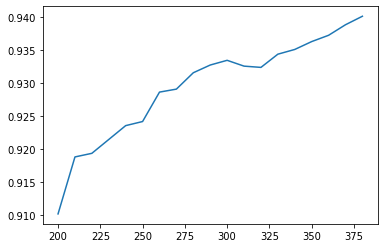

In [53]:
scores = []
for i in range(200,390,10):
    x_fschi = SelectKBest(chi2,k=i).fit_transform(x_var0,y)
    scores.append(cross_val_score(RFC(n_estimators=10,random_state=0),x_fschi,y,cv=5,n_jobs=-1).mean())
plt.plot(range(200,390,10),scores)
plt.show()

In [56]:
chivalues, pvalues_chi = chi2(x_var0,y)

In [57]:
# we can choose k according to p-values 
# p-value <= threshold(0.05 or 0.01) --> important feature
k = (pvalues_chi <= 0.05).sum()
k

708

In [63]:
## F-test: test the LINEAR depence between features and label
#.feature_selection.f_classif -- for classification problem
#.feature_selection.f_regression -- for regression problem
# work best for data satisified Normal distribution
from sklearn.feature_selection import f_classif

In [61]:
F, pvalues_f = f_classif(x_var0,y)
k = (pvalues_f<=0.05).sum()
k

660

In [62]:
x_fschi = SelectKBest(f_classif,k=k).fit_transform(x_var0,y)
cross_val_score(RFC(n_estimators=10,random_state=0),x_fschi,y,cv=5,n_jobs=-1).mean()

0.9382381812931359

In [64]:
## mutual info
#.feature_selection.mutual_info_classif
#.feature_selection.mutual_info_regression
from sklearn.feature_selection import mutual_info_classif as MIC

In [65]:
mf = MIC(x_var0,y)

In [66]:
mf

array([0.00000000e+00, 2.51946423e-03, 1.52928504e-03, 7.88286697e-03,
       3.77141675e-03, 0.00000000e+00, 1.25610246e-03, 0.00000000e+00,
       1.74347043e-03, 4.69385277e-03, 4.21586965e-03, 5.94507438e-03,
       2.09525235e-03, 7.46478545e-03, 8.85938254e-03, 9.58777117e-03,
       1.52672393e-03, 0.00000000e+00, 0.00000000e+00, 7.50909695e-03,
       0.00000000e+00, 4.12557597e-04, 0.00000000e+00, 0.00000000e+00,
       1.42913686e-03, 0.00000000e+00, 1.65193074e-04, 1.54125255e-03,
       5.08646791e-03, 6.05926019e-03, 8.34487032e-05, 6.85537550e-03,
       6.31379404e-03, 1.74445151e-02, 2.82220238e-02, 3.65833348e-02,
       4.56577690e-02, 5.12663953e-02, 5.09107186e-02, 4.84553958e-02,
       3.95473946e-02, 2.75110356e-02, 1.94100277e-02, 8.54570658e-03,
       6.99420710e-03, 6.09494748e-03, 2.21100696e-04, 1.60179043e-03,
       3.60177299e-03, 2.51068548e-03, 0.00000000e+00, 1.95753837e-03,
       4.87504320e-03, 9.25001531e-03, 1.37554222e-02, 2.46128854e-02,
      

In [67]:
mf.shape

(708,)

In [68]:
pd.DataFrame(mf).describe()

,0
count,708.000000
mean,0.079420
std,0.074663
min,0.000000
25%,0.006991
50%,0.061630
75%,0.137228
max,0.281654


In [ ]:
#x_fschi = SelectKBest(MIC,k=k).fit_transform(x_var0,y)
#cross_val_score(RFC(n_estimators=10,random_state=0),x_fschi,y,cv=5,n_jobs=-1).mean()

In [69]:
###Embedded
### like feature_importances in DecisionTree
### computationally expensive
#.feature_selection.SelectFromModel
#import parameters:
#estimator
#threshold
from sklearn.feature_selection import SelectFromModel

In [70]:
RFC_ = RFC(n_estimators=10,random_state=0)
x_embedded = SelectFromModel(RFC_,threshold=0.001).fit_transform(x,y)

In [71]:
x_embedded.shape

(42000, 279)

In [72]:
x.shape

(42000, 784)

In [73]:
### Wrapper = filtration + embedded
### feature_selection.RFE
#parameters:
#estimator
#n_features_to_select
#step
#.support_
#.ranking_
from sklearn.feature_selection import RFE

In [74]:
RFC_ = RFC(n_estimators=10,random_state=0)

In [75]:
selector = RFE(RFC_, n_features_to_select=340,step=50).fit(x,y)

In [77]:
selector.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,

In [78]:
# 1 is the most important feature, 10 is the most unimportant feature
selector.ranking_

array([10,  9,  8,  7,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  6,  6,
        5,  6,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  6,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  6,  6,  5,  4,
        4,  5,  3,  4,  4,  4,  5,  4,  5,  7,  6,  7,  7,  7,  8,  8,  8,
        8,  8,  8,  8,  8,  6,  7,  4,  3,  1,  2,  3,  3,  1,  1,  1,  1,
        1,  3,  3,  4,  5,  5,  5,  8,  8,  9,  9,  9,  9,  8,  9,  9,  4,
        4,  3,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  3,  4,
        5,  5,  9,  9, 10, 10, 10, 10,  7,  4,  4,  3,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  3,  5,  8, 10, 10, 10,
       10,  9,  4,  4,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  3,  4, 10, 10, 10, 10,  9,  7,  4,  3,  2,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        4,  4, 10,  9, 10

In [79]:
x_wrapper = selector.transform(x)

In [82]:
cross_val_score(RFC_,x_wrapper,y,cv=5).mean()

0.9389522459432109

In [ ]:
#again, we can plot learning curve to optimize n_features_to_select